<h1>Video Game Sales</h1>

In [174]:
#import necessary libraries for data preparation, data analysis, and data visualizations

#libraries for data preparation and data analysis
import pandas as pd
import numpy as np

#libraries for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Data Preparation</h2>

In [175]:
#data frame to read video game sales csv file
vg_df = pd.read_csv("vgsales.csv")

#displays the first 5 rows of data of the data frame
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [176]:
#displays the last 5 rows of data of the data frame
vg_df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [177]:
#checks the total number of null values for each column
vg_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [178]:
#displays the total number of rows and columns
vg_df.shape

(16598, 11)

This shows that from 16598 rows, in the "Year" column, it has 271 null values and in the "Publisher" column, it has 58 null values. As such, seeing as how the total null values for "Year" and "Publisher" only takes a small portion of the total rows, there is no need to delete the entire columns. 

In [179]:
#checks the info of each column 
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [180]:
#displays the total number of unique items for each columns
vg_df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

From the figure, it shows that despite there being 16598 rows, there are only 11493 unique "Name" which means that there might be duplicated names due to case distinction. 

In [181]:
#remove duplicated copies from the data set
vg_df.drop_duplicates()

#checks whether there are any duplicated copies at all from the data set
vg_df.shape

(16598, 11)

After removing any duplicate copies, the total number of rows is still the same as before which means that there are no duplicated copies. The unique number of "Name" being lesser than than the total number or rows/rank means that it must have been an indication of something else instead like Platform.

In [182]:
#checks the different platform by the same name 
vg_df.groupby(['Name']).Platform.value_counts()

Name                                     Platform
'98 Koshien                              PS          1
.hack//G.U. Vol.1//Rebirth               PS2         1
.hack//G.U. Vol.2//Reminisce             PS2         1
.hack//G.U. Vol.2//Reminisce (jp sales)  PS2         1
.hack//G.U. Vol.3//Redemption            PS2         1
                                                    ..
uDraw Studio                             Wii         1
uDraw Studio: Instant Artist             Wii         1
                                         X360        1
wwe Smackdown vs. Raw 2006               PS2         1
¡Shin Chan Flipa en colores!             DS          1
Name: Platform, Length: 16593, dtype: int64

This shows that the reason for there being lesser unique number of "Name" compared to "Rank" may indeed be because of the difference in platform for each "Name" of games

<h2>Data Analysis</h2>

After preparing the data, it can now be used for data analysis.

From the data observed before, the only columns with null values were "Year" and "Publisher". For now, we remove the column "Publisher" in order to prevent more rows of data being dropped because of it and observe the sales of video games in relation to platform, genre, and year

In [183]:
#create another data frame w/o the "Publisher" column
vg_df2 = vg_df.drop(['Publisher'], axis=1)
vg_df2 = vg_df2.dropna()
vg_df2.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [184]:
#checks the total number of rows and columns of the data set
vg_df2.shape

(16327, 10)

From the original total number of rows and columns, it can be observed that the rows with null values were removed and the column for "Publisher" was dropped as well

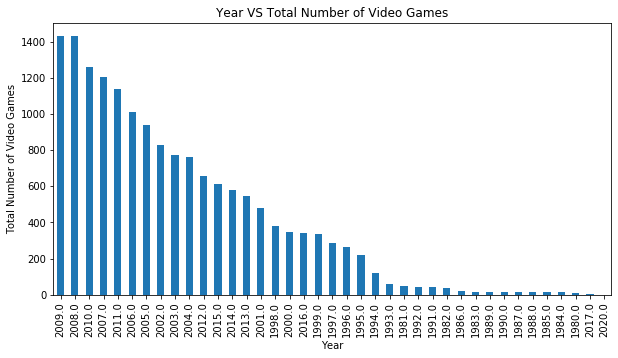

In [185]:
#shows the number of video games for each year there are in the data set
ax = vg_df2.Year.value_counts().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Year VS Total Number of Video Games")
ax.set_ylabel("Total Number of Video Games")
ax.set_xlabel("Year")
plt.show()

In [186]:
#displays the total number of games released per year
vg_df2.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

From the "Year" column data, it can be observed that the data came from year 1980 - 2020 and most of the games that were released was during 2009, followed by 2008, and 2010 respectively.

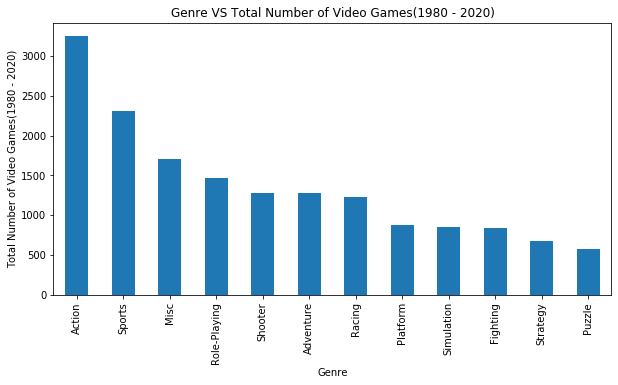

In [187]:
#shows the number of video games for each genre there are in the data set
ax = vg_df2.Genre.value_counts().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Genre VS Total Number of Video Games(1980 - 2020)")
ax.set_ylabel("Total Number of Video Games(1980 - 2020)")
ax.set_xlabel("Genre")
plt.show()

From the "Genre" column data, it can be observed that the top three popular genre among the players were action, sports and misc.

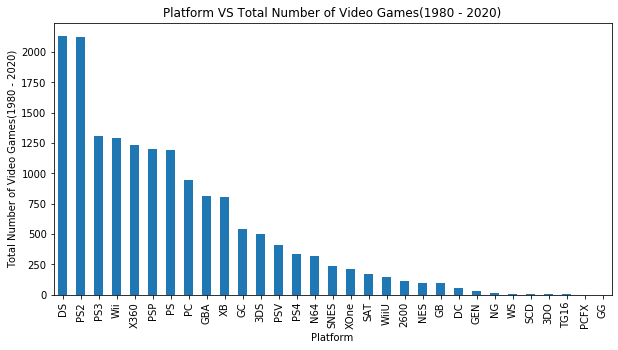

In [188]:
#shows the number of video games for each platform there are in the data set
ax = vg_df2.Platform.value_counts().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Platform VS Total Number of Video Games(1980 - 2020)")
ax.set_ylabel("Total Number of Video Games(1980 - 2020)")
ax.set_xlabel("Platform")
plt.show()

In [189]:
vg_df2.Platform.value_counts()

DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

From the "Platform" column, it can be observed that the top three platforms for games released are DS, PS2, PS3. 

From these three columns, Year, Genre, and Platform, we may be able to observe the trend of which genre or platform are being sold in a specific time frame. It may be also be observed that for each year of games being released can be a factor as well in contributing to the number of sales. 

First, we check the trend of sales for each genre of video games in North America, Europe, Japan, other countries, and globally

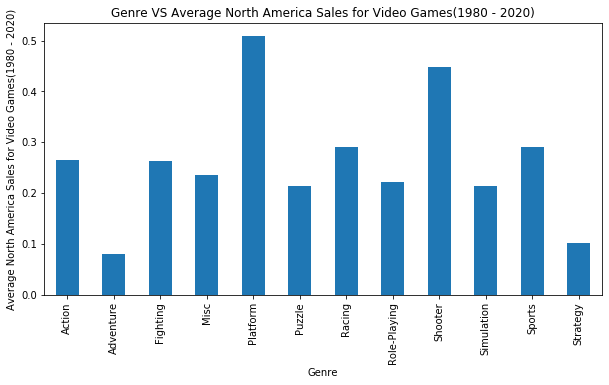

In [190]:
#shows the relationship of sales in North America for each genre of games
ax = vg_df2.groupby(['Genre']).NA_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Genre VS Average North America Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average North America Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Genre")
plt.show()

In [191]:
vg_df2.groupby(['Genre']).NA_Sales.mean()

Genre
Action          0.264925
Adventure       0.079984
Fighting        0.264043
Misc            0.235368
Platform        0.509121
Puzzle          0.213678
Racing          0.291134
Role-Playing    0.221958
Shooter         0.448643
Simulation      0.213608
Sports          0.290838
Strategy        0.101177
Name: NA_Sales, dtype: float64

From the graph, it can be seen that the top three sales genre of video games from year 1980 - 2020 are the following: Platform, Shooter, and Racing.

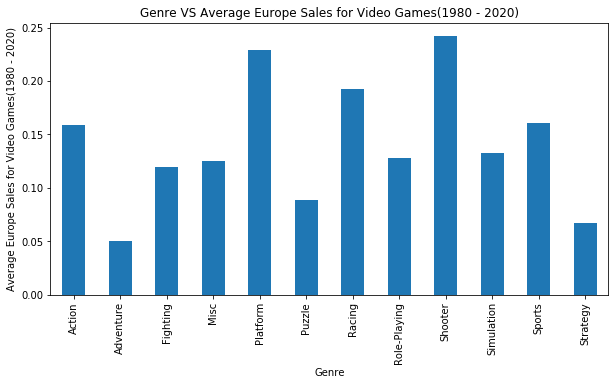

In [192]:
#shows the relationship of sales in Europe for each genre of games
ax =vg_df2.groupby(['Genre']).EU_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Genre VS Average Europe Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Europe Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Genre")
plt.show()

From the graph, it can be seen that top three genre of video games that were being sold in Europe are Shooter, Platform, amd Racing respectively for the year 1980-2020

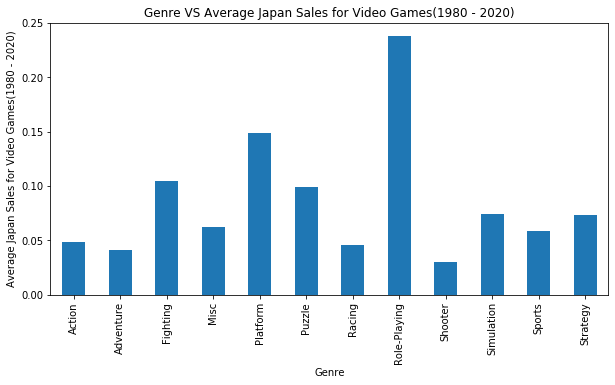

In [193]:
#shows the relationship of sales in Japan for each genre of games
ax = vg_df2.groupby(['Genre']).JP_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Genre VS Average Japan Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Japan Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Genre")
plt.show()

From the graph, it can be seen that the top three genre of video games sold in Japan are Role-Playing, Platform, and Fighting respectively for the year 1980-2020

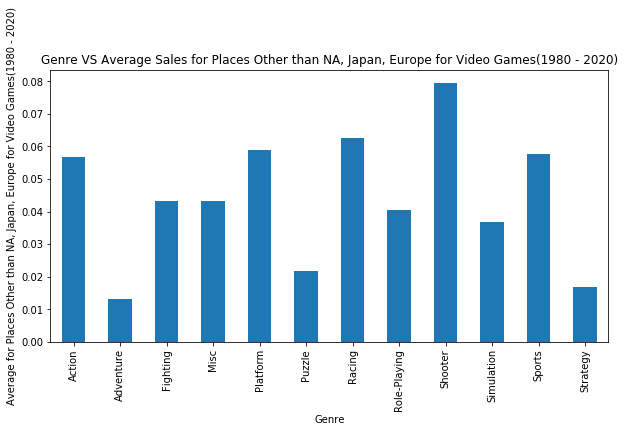

In [194]:
#shows the relationship of sales in the rest of the world for each genre of games
ax = vg_df2.groupby(['Genre']).Other_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Genre VS Average Sales for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_ylabel("Average for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_xlabel("Genre")
plt.show()

From the graph, it can be seen that the top 3 genre being sold from the rest of world are Shooter, Racing and Platform respectively for the year 1980-2020

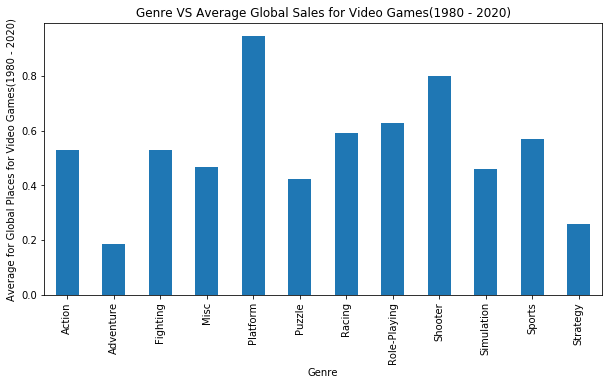

In [195]:
#shows the relationship of global sales for each genre of games
ax = vg_df2.groupby(['Genre']).Global_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Genre VS Average Global Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average for Global Places for Video Games(1980 - 2020)")
ax.set_xlabel("Genre")
plt.show()

From the graph, globally, the top 3 genres being sold the highest are Platform, Shooter, and Role-Playing for the year 1980-2020

After observing the graphs pertaining to genre and sales from different places and globally, it can be said that Platform is the most popular genre that users are interested to play in for the year 1980-2020. Not only that, preferences for each genre may be due to the culture the users grew up with. 

Next, we observe the average sales for each platform of video games for North America, Europe, Japan, rest of the world, and globally

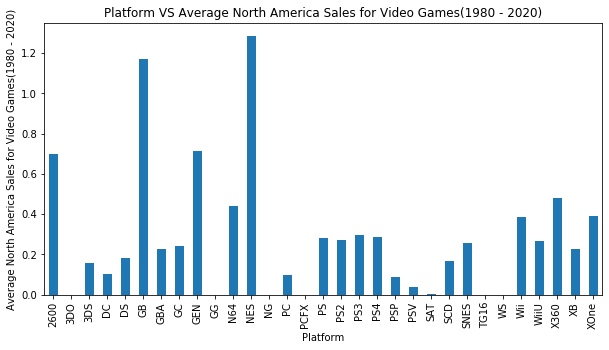

In [196]:
#shows the relationship of sales in North America for each platform of games
ax = vg_df2.groupby(['Platform']).NA_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Platform VS Average North America Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average North America Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Platform")
plt.show()

From the graph, it can be observed that platforms NES, GB, and GEN have the highest average sales for video games from the year 1980-2020 in North America 

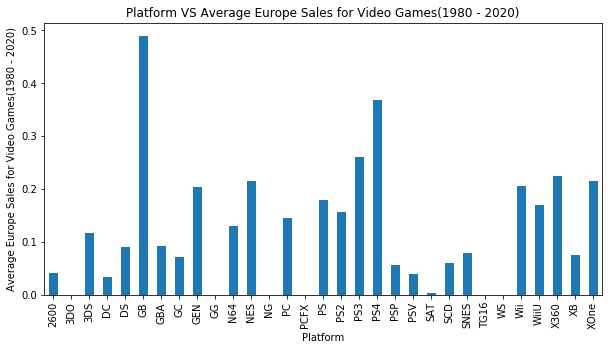

In [197]:
#shows the relationship of sales in Europe for each platform of games
ax =vg_df2.groupby(['Platform']).EU_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Platform VS Average Europe Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Europe Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Platform")
plt.show()

From the graph, it can be observed that platforms GB, PS4, and PS3 have the highest average sales for video games from the year 1980-2020 in Europe 

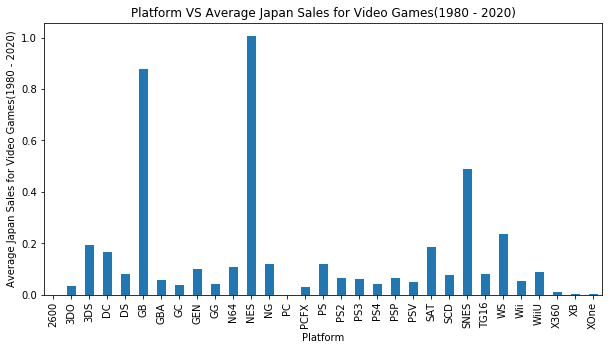

In [198]:
#shows the relationship of sales in Japan for each platform of games
ax = vg_df2.groupby(['Platform']).JP_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Platform VS Average Japan Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Japan Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Platform")
plt.show()

From the graph, it can be observed that platforms NES, GB, and SNES have the highest average sales for video games from year 1980-2020 in Japan

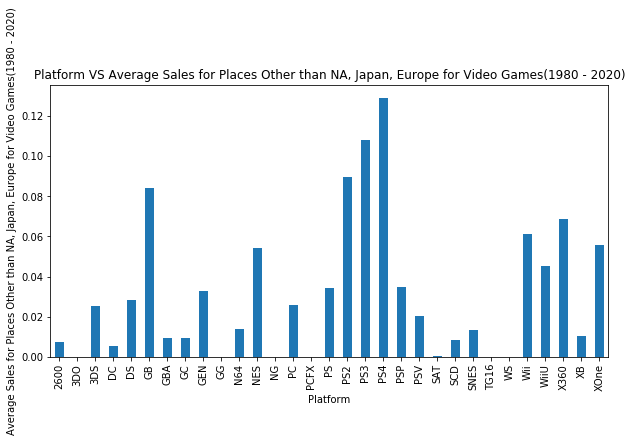

In [199]:
#shows the relationship of sales in the rest of the world for each platform of games
ax = vg_df2.groupby(['Platform']).Other_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Platform VS Average Sales for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_ylabel("Average Sales for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_xlabel("Platform")
plt.show()

From the graph, it can be observed that platforms PS4, PS3, and PS2 have the highest sales for video games from year 1980-2020 in the rest of the world

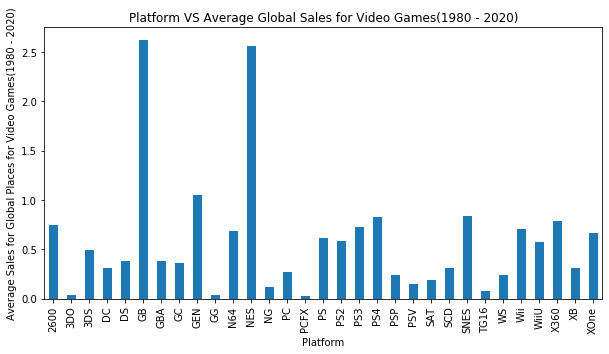

In [200]:
#shows the relationship of global sales for each platform of games
ax = vg_df2.groupby(['Platform']).Global_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Platform VS Average Global Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Sales for Global Places for Video Games(1980 - 2020)")
ax.set_xlabel("Platform")
plt.show()

From the graph, it can be observed that the platforms GB, NES, and GEN has the highest sales for video games from year 1980-2020

From the graphs related to sales vs platforms, it can be seen that for places like North America, Europe and Japan, their common platforms of video games having high sales, is GB while for other places, it may not be the case. For globally, however, GB platform for video games takes precedence of having the highest sales, followed by NES. The reasons may be due to production of the said medium in different places may vary or comfortability of using the said medium in playing games. 

At this point, we may infer that users with preferences for Platform games have GB or NES platforms. As such, sales for the said genre and platform are quite high.  

In [201]:
#display the number of video games for each genre's platform specifically for "platform"
vg_df2.groupby('Genre').Platform.value_counts().tail(185)

Genre     Platform
Platform  3DS         28
          NES         28
          SNES        26
          X360        24
          GB          18
                      ..
Strategy  WiiU         3
          XOne         3
          WS           2
          GEN          1
          SCD          1
Name: Platform, Length: 185, dtype: int64

In [202]:
#display the sales of video games for each genre's platform specifically for "platform" GB
vg_df2.groupby(['Genre', 'Platform']).Global_Sales.mean().tail(195)

Genre     Platform
Platform  2600        1.474444
          3DS         1.151071
          DC          1.270000
          DS          0.860222
          GB          2.993333
                        ...   
Strategy  Wii         0.209200
          WiiU        0.413333
          X360        0.361852
          XB          0.132381
          XOne        0.126667
Name: Global_Sales, Length: 195, dtype: float64

In [203]:
#display the sales of video games for each genre's platform specifically for "platform" NES
vg_df2.groupby(['Genre', 'Platform']).Global_Sales.mean().tail(189)

Genre     Platform
Platform  GC          0.392603
          GEN         2.207143
          GG          0.040000
          N64         1.204333
          NES         3.420714
                        ...   
Strategy  Wii         0.209200
          WiiU        0.413333
          X360        0.361852
          XB          0.132381
          XOne        0.126667
Name: Global_Sales, Length: 189, dtype: float64

More or less, we can infer that there is some truth to user playing Platform games with NES or GB base on the sales. 

Here, after observing the trend of sales in relation to platform, genre, and year, we start observing the trend for whether the publisher has a correlation to contributing sales for different places. 

Since we are going to be observing the trend by publisher and sales, we have no need for the year of the video game's release for it was checked before already (i.e. the trend for genre, platform and year)

In [204]:
#create another data frame w/o the "Year" column
vg_df3 = vg_df.drop(['Year'], axis=1)

#drop rows with null values
vg_df3 = vg_df3.dropna()
vg_df3.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [205]:
#checks the number of rows and columns that the data set
vg_df3.shape

(16540, 10)

Here, we observe that the original total number of rows and columns lessened which means rows with null values "Year" column  were successfuly dropped.

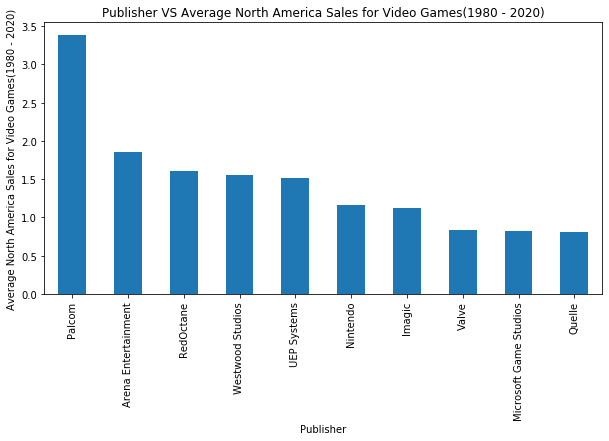

In [206]:
#shows the relationship of sales in North America for each publisher of games
sort = vg_df3.groupby(['Publisher']).NA_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average North America Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average North America Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

From the graph, we can observe that the top 3 publishers, Palcom, Arena Entertainment, and RedOctance, have the highest average sales for video games in North America for year 1980-2020

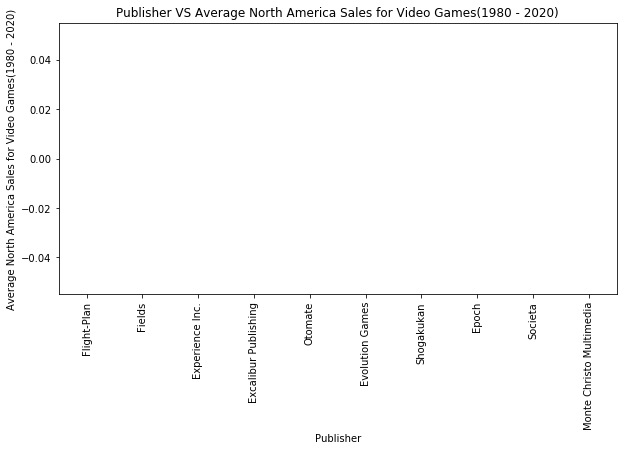

In [207]:
#shows the relationship of sales in North America for each publisher of games
sort = vg_df3.groupby(['Publisher']).NA_Sales.mean().sort_values(ascending=False)
ax = sort.tail(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average North America Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average North America Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

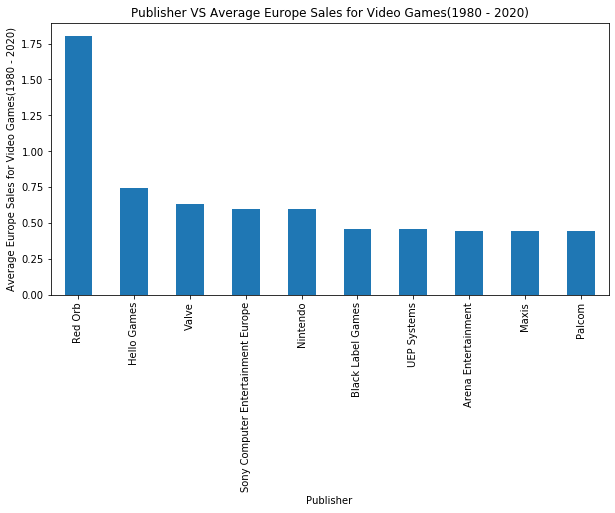

In [208]:
#shows the relationship of sales in Europe for each publisher of games
sort = vg_df3.groupby(['Publisher']).EU_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Europe Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Europe Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

From the graph, the publishers, Red Orb, Hello Games, and Valve, have the highest sales for the video games from year 1980-2020 in Europe

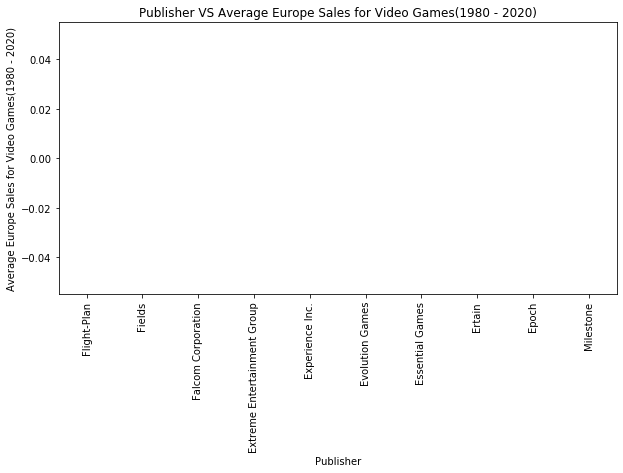

In [209]:
#shows the relationship of sales in Europe for each publisher of games
sort = vg_df3.groupby(['Publisher']).EU_Sales.mean().sort_values(ascending=False)
ax = sort.tail(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Europe Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Europe Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

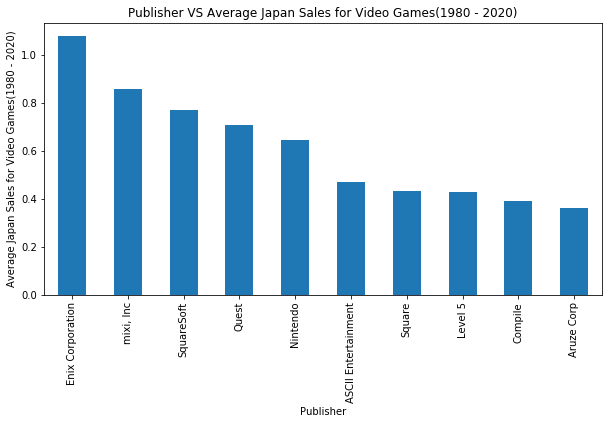

In [210]:
#shows the relationship of sales in JAPAN for each publisher of games
sort = vg_df3.groupby(['Publisher']).JP_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Japan Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Japan Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

From the graph, the publishers, Enix Corporation, mixi, Inc and SquareSoft have the highest sales for their video games from year 1980-2020 in Japan

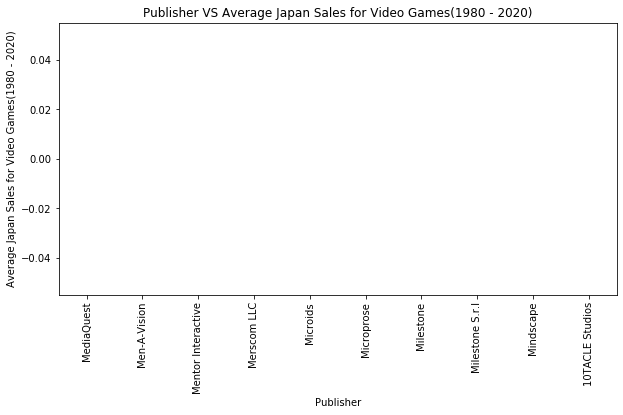

In [211]:
#shows the relationship of sales in JAPAN for each publisher of games
sort = vg_df3.groupby(['Publisher']).JP_Sales.mean().sort_values(ascending=False)
ax = sort.tail(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Japan Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Japan Sales for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

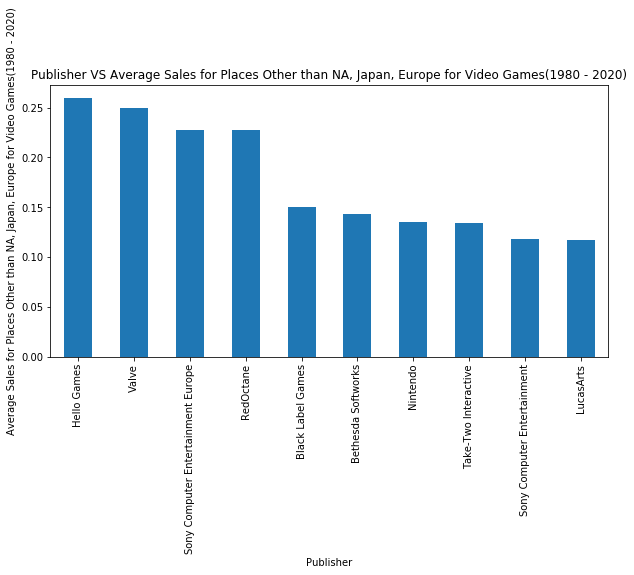

In [212]:
#shows the relationship of sales in places other than north america, europe, and japan for each publisher of games
sort = vg_df3.groupby(['Publisher']).Other_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Sales for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_ylabel("Average Sales for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

From the graph, we can observe that the top 3 publishers, Hello Games, Valve and Sony Computer Entertainment Europe, have the highest sales for their video games from year 1980-2020 in places other than North America, Europe and Japan

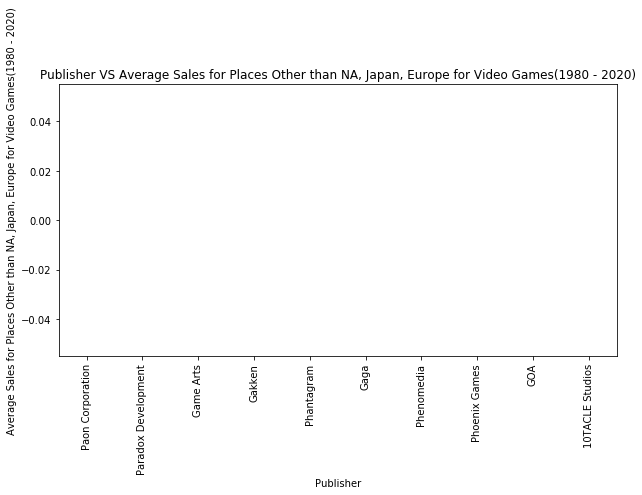

In [213]:
#shows the relationship of sales in places other than north america, europe, and japan for each publisher of games
sort = vg_df3.groupby(['Publisher']).Other_Sales.mean().sort_values(ascending=False)
ax = sort.tail(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Sales for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_ylabel("Average Sales for Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_xlabel("Publisher")
plt.show()

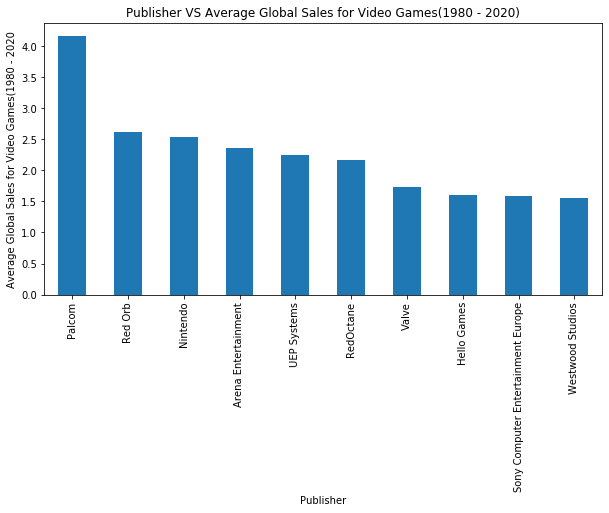

In [214]:
#shows the relationship of sales globally for each publisher of games
sort = vg_df3.groupby(['Publisher']).Global_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Global Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Global Sales for Video Games(1980 - 2020")
ax.set_xlabel("Publisher")
plt.show()

From the graph, we can observe that the top 3 publishers, Palcom, Red Orb and Nintendo, have the highest sales for their video games from year 1980-2020 globally

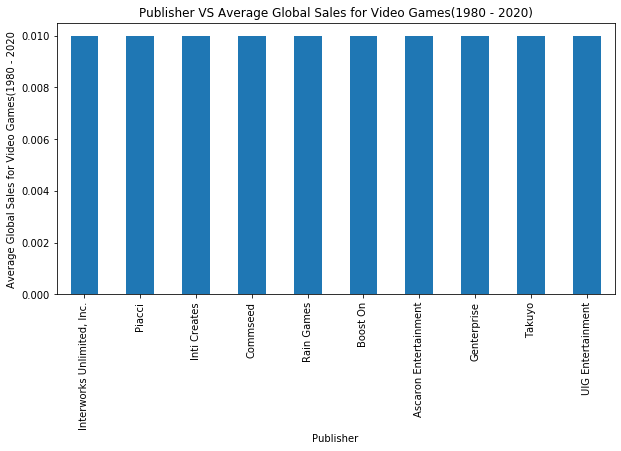

In [215]:
#shows the relationship of sales globally for each publisher of games
sort = vg_df3.groupby(['Publisher']).Global_Sales.mean().sort_values(ascending=False)
ax = sort.tail(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Global Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Global Sales for Video Games(1980 - 2020")
ax.set_xlabel("Publisher")
plt.show()

Here, we start checking the relationship of the sales for each publisher's genre and platforms for their video games

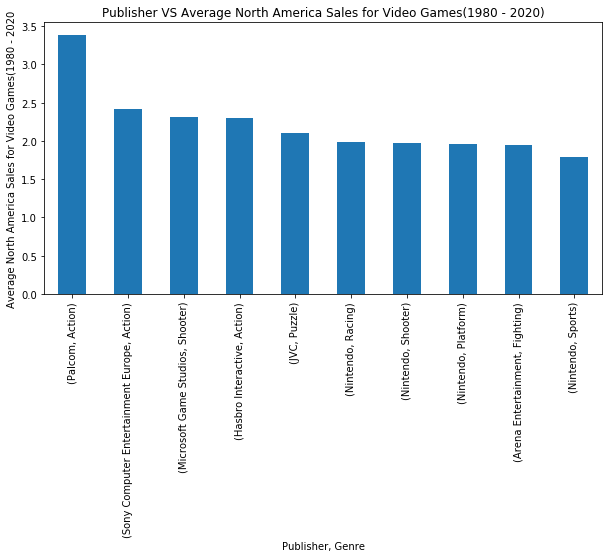

In [216]:
#shows the relationship of sales in North America for each publisher's genre of games
sort = vg_df3.groupby(['Publisher', 'Genre']).NA_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average North America Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average North America Sales for Video Games(1980 - 2020")
ax.set_xlabel("Publisher, Genre")
plt.show()

From the graph, the top 3 publishers, Palcom, Sony Computer Entertainment Europe, and Microsoft Game Studious, along with their genre, Action, Action, and Shooter, respectively have the highest sales for video games from year 1980-2020 in North America.  

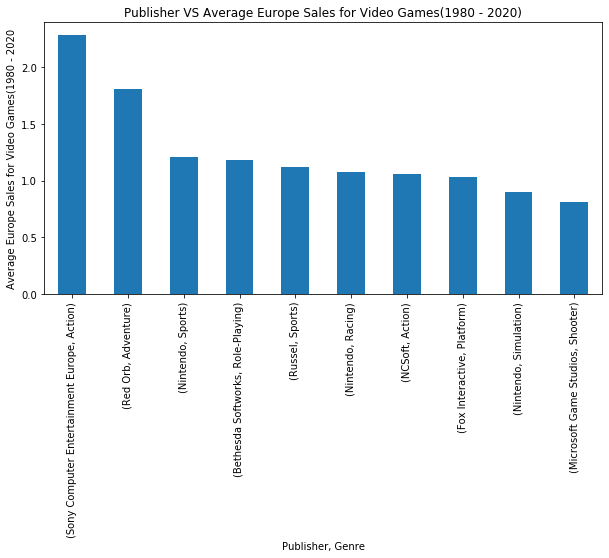

In [217]:
#shows the relationship of sales in Europe for each publisher's genre of games
sort = vg_df3.groupby(['Publisher', 'Genre']).EU_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Europe Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Europe Sales for Video Games(1980 - 2020")
ax.set_xlabel("Publisher, Genre")
plt.show()

From the graph, the top 3 publishers, Sony Computer Entertainment Europe, Red Orb, and Nintendo, along with their respective genre, Action, Adventure, and Sports, have the highest sales from year 1980-2020 in Europe

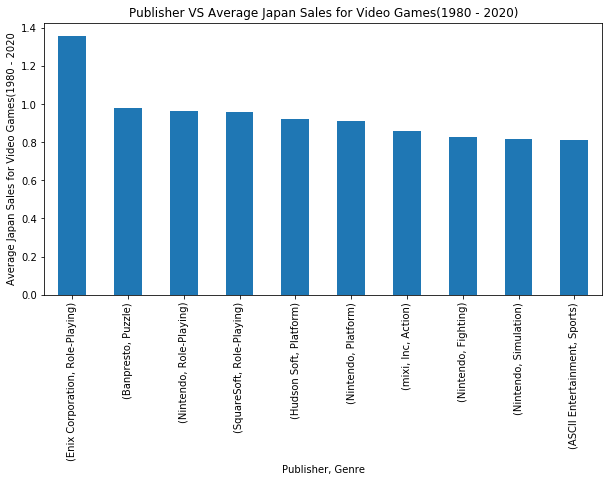

In [218]:
#shows the relationship of sales in Japan for each publisher's genre of games
sort = vg_df3.groupby(['Publisher', 'Genre']).JP_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Japan Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Japan Sales for Video Games(1980 - 2020")
ax.set_xlabel("Publisher, Genre")
plt.show()

From the graph, the top 3 publishers, Electronic Arts, Activision, and Konami Digital Entertainment, along with their respective genres, Sports, Action, and Sports, have the highest sales for video games in year 1980-2020 in Japan

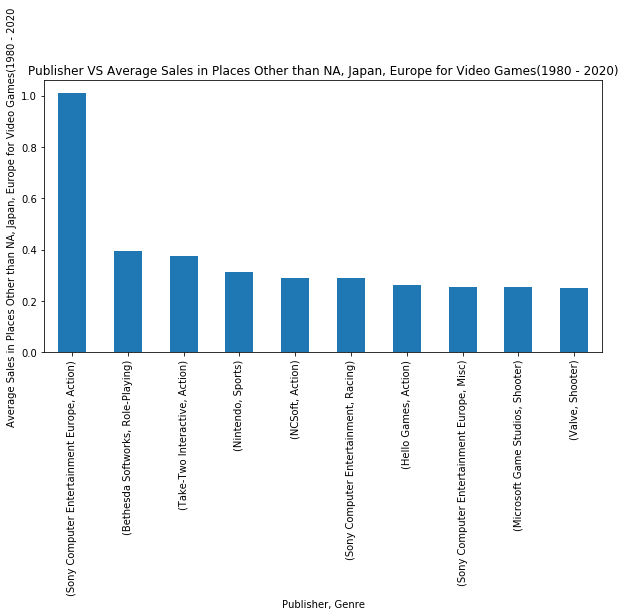

In [219]:
#shows the relationship of sales in Places Other than NA, Japan, Europe for each publisher's genre of games
sort = vg_df3.groupby(['Publisher', 'Genre']).Other_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Average Sales in Places Other than NA, Japan, Europe for Video Games(1980 - 2020)")
ax.set_ylabel("Average Sales in Places Other than NA, Japan, Europe for Video Games(1980 - 2020")
ax.set_xlabel("Publisher, Genre")
plt.show()

From the graph, the top 3 publishers, Sony Computer Entertainment Europe, Bethesda Softworks, and Take-Two Interactive, along with their respective genres, Action, Role-Playing, and Action, have the highest sales for video games from year 1980-2020 in the rest of world.

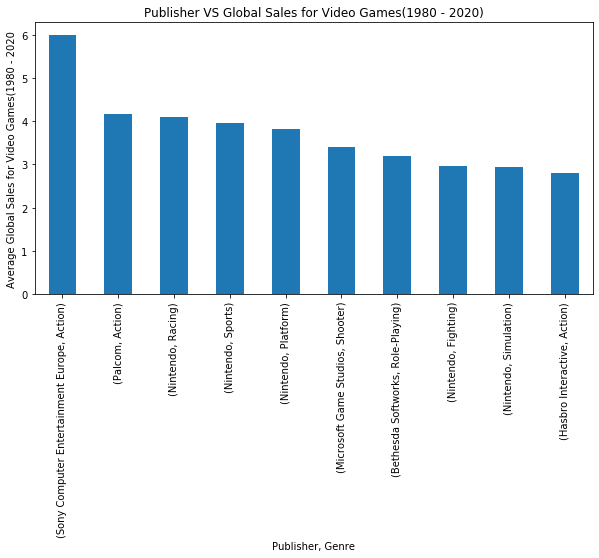

In [220]:
#shows the relationship of sales for each publisher's genre of games globally
sort = vg_df3.groupby(['Publisher', 'Genre']).Global_Sales.mean().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Global Sales for Video Games(1980 - 2020)")
ax.set_ylabel("Average Global Sales for Video Games(1980 - 2020")
ax.set_xlabel("Publisher, Genre")
plt.show()

From the graph, the top 3 publishers, Sony Computer Entertainment Europe, Palcom and Nintendo, along with their respctive genre, Action, Action, and Racing, have the highest sales for video games from year 1980-2020 globally.

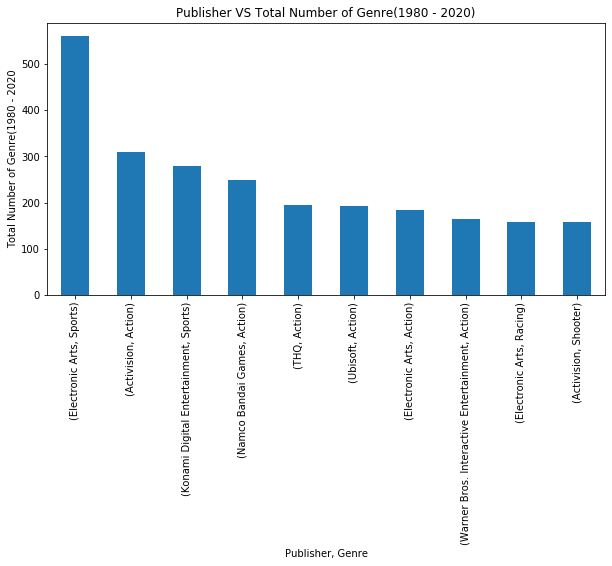

In [221]:
#shows the relationship of total number of video games per genre for each publisher of games
sort = vg_df3.groupby(['Publisher']).Genre.value_counts().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher VS Total Number of Genre(1980 - 2020)")
ax.set_ylabel("Total Number of Genre(1980 - 2020")
ax.set_xlabel("Publisher, Genre")
plt.show()

From the graph, it can be seen that the top 3 publishers, Electronic Arts, Activision, and Konami Digital Entertainment, along with their respective genres, Sports, Action and Sports, have the highest number of published games for specific generes.

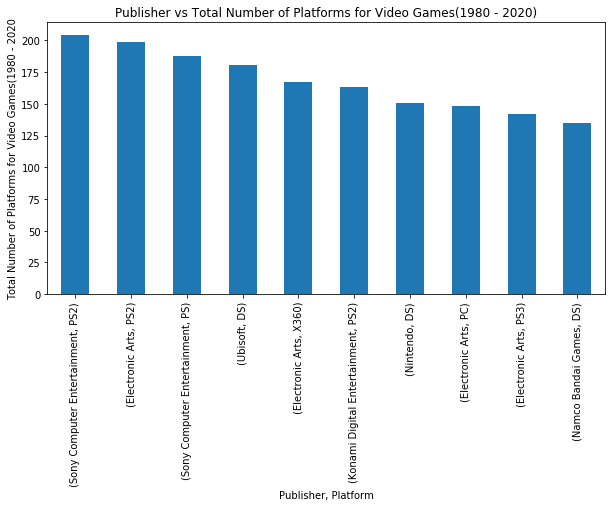

In [222]:
#shows the relationship of total number of video games per platform for each publisher of games
sort = vg_df3.groupby(['Publisher']).Platform.value_counts().sort_values(ascending=False)
ax = sort.head(10).plot(kind = 'bar', figsize= (10, 5))
ax.set_title("Publisher vs Total Number of Platforms for Video Games(1980 - 2020)")
ax.set_ylabel("Total Number of Platforms for Video Games(1980 - 2020")
ax.set_xlabel("Publisher, Platform")
plt.show()

From the graph, it can be seen that top 3 publishers, Sony Computer Entertainment, Electronic Arts, and Sony Computer Entertainment, along with their respective platforms, PS2, PS2, and PS, have the highest number of published games for specific platforms.

From the information we have so far, it can be observed that the highest sales for video games' genre doesn't necessarily correspond to the Publisher's sales for their video games. Not only that, since sales for some video games' genre are related to its respective platforms, it can be inferred that a publisher's video game's platform doesn't necessarily correspond to the highest sales globally as well. On another note, having produced more video games compared to other publishers doesn't mean that the publishers'video games would have the average highest sales out of all. 

<h1>Data Visualization</h1>

1) relationship of sales in response to genre-platform

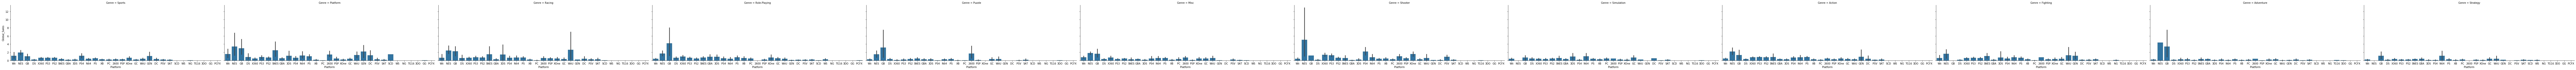

In [223]:
#shows the relationship of sales in response to genre-platform
g = sns.FacetGrid(vg_df2, col="Genre", height=4, aspect=3)
sort = vg_df2['Platform'].unique().tolist()
g.map(sns.barplot, "Platform", "Global_Sales", order=sort)

**double click on the graph to see it better.

From the graph, some genre corresponds to specifc platforms. As such, it can be said the video games that have the highest sales are those that corresponds to the genre they like and what specific platforms they are more compatible with. 

2) relationship of sales in response to publisher

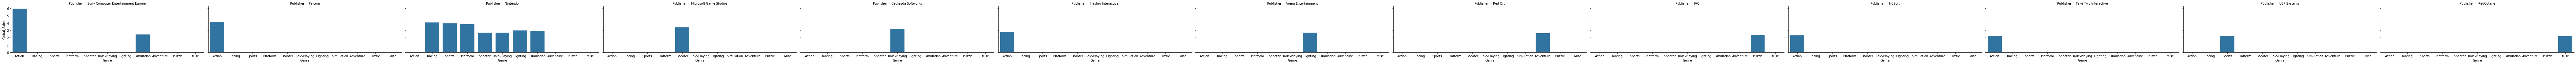

In [265]:
#shows the partial relationship of sales in response to genre-platform
sort = vg_df3.groupby(['Publisher', 'Genre']).Global_Sales.mean().sort_values(ascending=False)
ax = sort.head(20).to_frame(name = 'Global_Sales').reset_index()

g = sns.FacetGrid(ax, col="Publisher", height=3, aspect=3)
sort = ax['Genre'].unique().tolist()
g.map(sns.barplot, "Genre", "Global_Sales", order=sort)

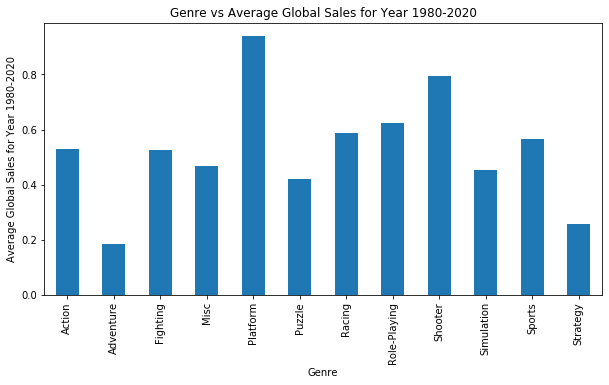

In [270]:
#displays the global sales for each genre of video games
ax = vg_df3.groupby(['Genre']).Global_Sales.mean().plot(kind = 'bar', figsize= (10, 5))
ax.set_ylabel('Average Global Sales for Year 1980-2020')
ax.set_title('Genre vs Average Global Sales for Year 1980-2020')
plt.show()

From both graphs, it can be observed there is not much correlation between the publishers's video games having top sales because of its genre - which also means that the publisher's video games having top sales may not also be necessarily because of its platform, as stated before. The reason for the publisher to have higher average global sales may be because the users like the publisher's style of video games itself or not at all. Having more games published by the same publisher doesn't necessarily mean the publisher will be able to garner high sales for each of them. 

Some note that can be used to infer in checking which type of video games is popular for each place would be to look into the place's culture for it can influence the user's preferences. 